# Task 1 #

### a. Movis longer than 3h (180 minutes) ###

In [ ]:
film_length = duckdb.sql("""
    SELECT
        title,
        length
    FROM
        film
    WHERE
        length > 180
""").df()

film_length

,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


### b. Movies with the word 'love' in the title ###

In [45]:
film_love_title = duckdb.sql("""
    SELECT
        title,
        rating,
        length,
        description
    FROM
        film
    WHERE
        title LIKE '%LOVE%'
""").df()

film_love_title

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


### c. Statistiscs: Film lengths

In [49]:
length_statistics = duckdb.sql("""
SELECT
    MIN(length) AS shortest_length,
    MAX(length) AS longest_length,
    ROUND(AVG(length)) AS average_length,
    ROUND(MEDIAN(length)) AS median_length
    FROM
        film
""").df()

length_statistics

,shortest_length,longest_length,average_length,median_length
0,46,185,115.0,114.0


### d. Rental cost: Top 10 most expensive movies (price per day) ###

In [59]:
rent_price = duckdb.sql("""
SELECT
    title,
    ROUND(rental_rate / rental_duration) AS daily_rental_cost
    FROM
        film
    ORDER BY daily_rental_cost DESC
    LIMIT 10
""").df()

rent_price

,title,daily_rental_cost
0,ACE GOLDFINGER,2.0
1,AUTUMN CROW,2.0
2,BEHAVIOR RUNAWAY,2.0
3,BEAST HUNCHBACK,2.0
4,BACKLASH UNDEFEATED,2.0
5,CARIBBEAN LIBERTY,2.0
6,BILKO ANONYMOUS,2.0
7,CASPER DRAGONFLY,2.0
8,AMERICAN CIRCUS,2.0
9,CASUALTIES ENCINO,2.0


### e. Top 10 actors - based on number of movies

In [ ]:
with duckdb.connect("data/sakila.duckdb") as conn:
    top_actors = conn.sql("""
        SELECT
            a.first_name,
            a.last_name,
            COUNT(fa.film_id) AS nr_films
        FROM
            actor a
        LEFT JOIN staging.film_actor fa ON a.actor_id = fa.actor_id
        GROUP BY a.actor_id, a.first_name, a.last_name
        ORDER BY nr_films DESC
        LIMIT 10                            
    """).df()

top_actors

,first_name,last_name,nr_films
0,GINA,DEGENERES,42
1,WALTER,TORN,41
2,MARY,KEITEL,40
3,MATTHEW,CARREY,39
4,SANDRA,KILMER,37
5,SCARLETT,DAMON,36
6,VIVIEN,BASINGER,35
7,VAL,BOLGER,35
8,ANGELA,WITHERSPOON,35
9,UMA,WOOD,35


### f. Statistics: Rental length

In [87]:
dfs["film"]["rental_duration"].describe().round(0)

count    1000.0
mean        5.0
std         1.0
min         3.0
25%         4.0
50%         5.0
75%         6.0
max         7.0
Name: rental_duration, dtype: float64

### g. Most rented movies

In [13]:
with duckdb.connect("data/sakila.duckdb") as conn:
    top_movies = conn.sql("""
        SELECT
            title,
            rating,
            release_year,
            COUNT(*) AS nr_rentals
        FROM
            staging.rental r
        JOIN staging.inventory i ON r.inventory_id = i.inventory_id
        JOIN staging.film f ON i.film_id = f.film_id
        GROUP BY f.title, f.rating, f.release_year
        ORDER BY nr_rentals DESC
        LIMIT 10                            
    """).df()

top_movies

,title,rating,release_year,nr_rentals
0,BUCKET BROTHERHOOD,PG,2006,34
1,ROCKETEER MOTHER,PG-13,2006,33
2,SCALAWAG DUCK,NC-17,2006,32
3,RIDGEMONT SUBMARINE,PG-13,2006,32
4,FORWARD TEMPLE,NC-17,2006,32
5,JUGGLER HARDLY,PG-13,2006,32
6,GRIT CLOCKWORK,PG,2006,32
7,NETWORK PEAK,PG-13,2006,31
8,HOBBIT ALIEN,PG-13,2006,31
9,APACHE DIVINE,NC-17,2006,31


### h. How many languages does our system support and how many different languages of movies exist right now in our system

In [101]:
dfs["language"]["name"].value_counts()

name
English     1
Italian     1
Japanese    1
Mandarin    1
French      1
German      1
Name: count, dtype: int64

In [100]:
movie_languages = dfs["language"].merge(dfs["film"], on="language_id")

films_per_language = movie_languages["name"].value_counts()

films_per_language

name
English    1000
Name: count, dtype: int64

# Task 2

### a. Top 5 customers by spend

In [20]:

with duckdb.connect("data/sakila.duckdb") as conn:
    top_customers = conn.sql("""
        SELECT
            c.first_name || ' ' || c.last_name AS customer,
            COUNT(p.amount) AS spend
        FROM
            staging.customer c
        JOIN staging.payment p ON p.customer_id = c.customer_id
        GROUP BY customer
        ORDER BY spend DESC
        LIMIT 5                            
    """).df()

top_customers

,customer,spend
0,ELEANOR HUNT,46
1,KARL SEAL,45
2,MARCIA DEAN,42
3,CLARA SHAW,42
4,TAMMY SANDERS,41


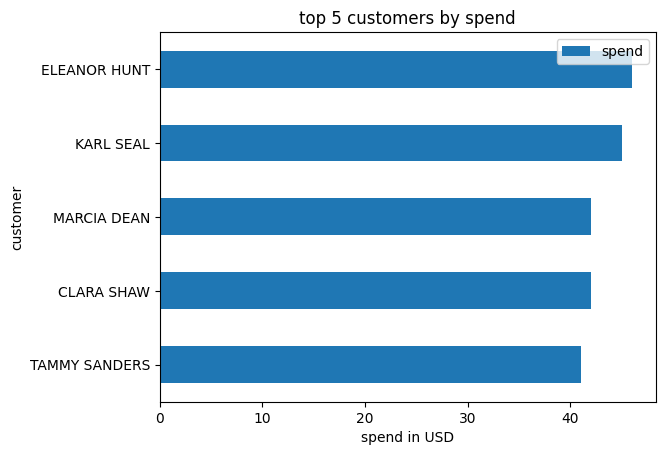

In [28]:
ax = top_customers.head(5).plot(
    kind="barh",
    x="customer",
    y="spend",
    title="top 5 customers by spend",
    xlabel="spend in USD",
)
ax.invert_yaxis()

### b. Revenue per film category

In [29]:
with duckdb.connect("data/sakila.duckdb") as conn:
    top_film_category = conn.sql("""
        SELECT 
            name AS category,
            COUNT(p.amount) AS revenue
        FROM staging.category c
        JOIN staging.film_category fc ON c.category_id = fc.category_id
        JOIN staging.film f ON fc.film_id = f.film_id
        JOIN staging.inventory i ON f.film_id = i.film_id      
        JOIN staging.rental r ON i.inventory_id = r.inventory_id  
        JOIN staging.payment p ON r.rental_id = p.rental_id
        GROUP BY category
        ORDER BY revenue DESC   
    """).df()

top_film_category

,category,revenue
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


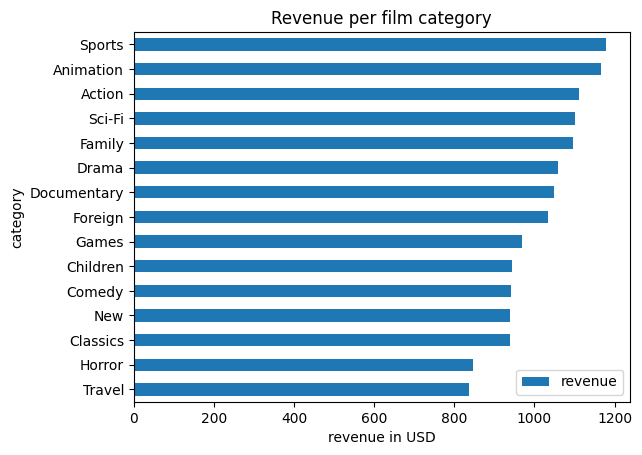

In [32]:
ax = top_film_category.head(15).plot(
    kind="barh",
    x="category",
    y="revenue",
    title="Revenue per film category",
    xlabel="revenue in USD",
)
ax.invert_yaxis()